In [2]:
#!pip install -r "requirements.txt"

In [548]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [549]:
pd.options.display.max_columns = None

In [588]:
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")
pokemon = pd.read_csv("./pokemon.csv", index_col="#")

In [590]:
pokemon.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [591]:
combats

,Winner,First_pokemon,Second_pokemon
0,1,650,579
1,1,151,558
2,1,340,631
3,2,688,139
4,2,365,132
...,...,...,...
39995,1,608,403
39996,2,761,149
39997,1,740,320
39998,1,465,536


In [553]:
combats['has_first_pokemon_win'] = combats['Winner'] == combats['First_pokemon']

In [ ]:
def convertTarget(df):
    df['has_first_pokemon_win'] = df['Winner'] == df['First_pokemon']
    df.loc[df['has_first_pokemon_win'] == True, 'Winner'] = 1
    df.loc[df['has_first_pokemon_win'] == False, 'Winner'] = 2
    df.drop(columns=['has_first_pokemon_win'], inplace=True)

In [555]:
combats.head()

,Winner,First_pokemon,Second_pokemon
0,1,650,579
1,1,151,558
2,1,340,631
3,2,688,139
4,2,365,132


In [556]:
#null_values_count = pokemon['Type 2'].isna().sum()

#print(null_values_count / len(pokemon.index)* 100)
#len(pokemon.index)
#pokemon['Type 2'].isna().sum()
#pokemon.loc[pokemon['Name'] == 'Charmander']

In [557]:
try:
    pokemon = pokemon.drop(columns=['Name', 'Type 2', 'Type 1', 'Generation', 'Defense'])
except:
    print("Errore")

In [558]:
encoder = LabelEncoder()
categorical_cols = ['Type 1', 'Type 2']
for col in categorical_cols:
    try:
        pokemon[col] = encoder.fit_transform(pokemon[col])
    except:
        continue

In [559]:
pokemon.Legendary = pokemon.Legendary.map(lambda el: 1 if el else 0)

In [560]:
pokemon.head()

,HP,Attack,Sp. Atk,Sp. Def,Speed,Legendary
#,,,,,,
1,45,49,65,65,45,0
2,60,62,80,80,60,0
3,80,82,100,100,80,0
4,80,100,122,120,80,0
5,39,52,60,50,65,0


In [561]:
full_data = pd.merge(combats, pokemon.add_prefix("First_pokemon_"), how="left", left_on=['First_pokemon'], right_index=True)
full_data = pd.merge(full_data, pokemon.add_prefix("Second_pokemon_"), how="left", left_on=['Second_pokemon'], right_index=True)
full_data.drop(columns=['First_pokemon', 'Second_pokemon'], inplace=True)
full_data.head()

,Winner,First_pokemon_HP,First_pokemon_Attack,First_pokemon_Sp. Atk,First_pokemon_Sp. Def,First_pokemon_Speed,First_pokemon_Legendary,Second_pokemon_HP,Second_pokemon_Attack,Second_pokemon_Sp. Atk,Second_pokemon_Sp. Def,Second_pokemon_Speed,Second_pokemon_Legendary
0,1,50,75,40,45,60,0,50,55,36,30,43,0
1,1,70,60,115,70,55,0,65,63,45,45,45,0
2,1,70,75,135,80,135,0,80,95,60,82,75,0
3,2,95,110,40,95,55,0,75,100,40,70,110,0
4,2,45,40,40,75,50,0,40,45,100,120,90,0


In [562]:
#sns.countplot(x=full_data['First_pokemon_Type 1'], hue=full_data['Winner'])

In [563]:
#sns.countplot(x=full_data['Second_pokemon_Type 1'], hue=full_data['Winner'])

In [564]:
#sns.countplot(x=full_data['First_pokemon_Legendary'], hue=full_data['Winner'])

In [565]:
#sns.countplot(x=full_data['Second_pokemon_Legendary'], hue=full_data['Winner'])

<AxesSubplot:>

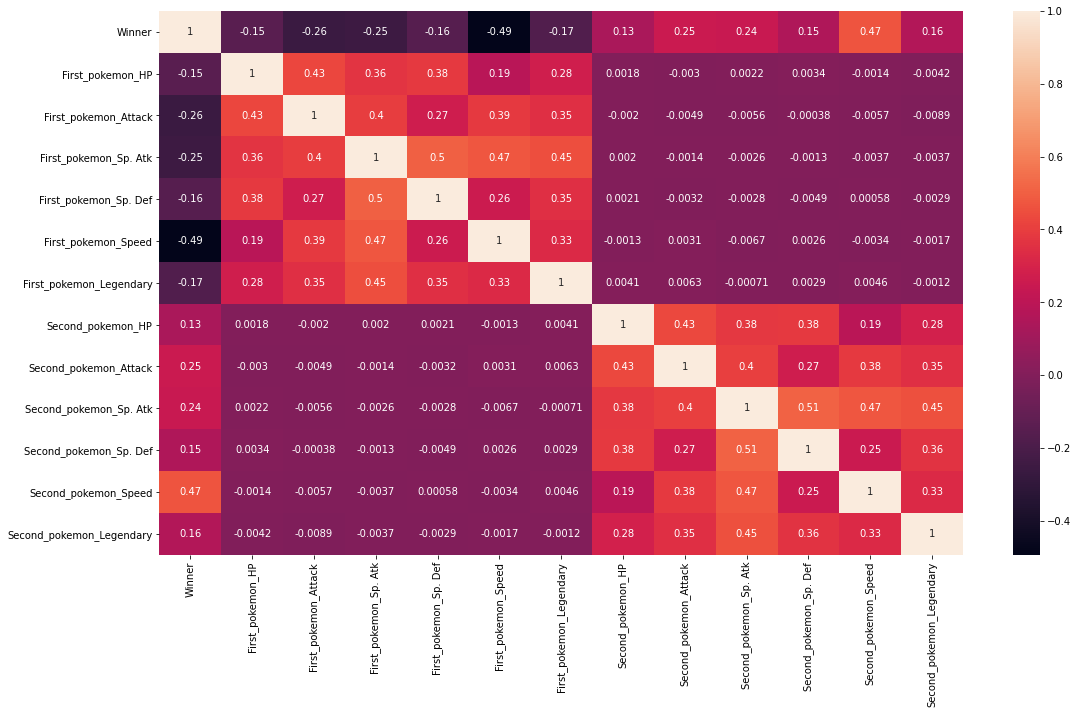

In [566]:
corr = full_data.corr()
plt.figure(figsize=(18, 10))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True)

In [568]:
X = full_data.drop(columns=['Winner'])
y = full_data.Winner

In [582]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20)

In [583]:
model = RandomForestClassifier(random_state=20)
model.fit(X_train, y_train)

print("Trained!")

Trained!


In [584]:
train_score = model.score(X_train, y_train)
print(f"Train set score: {round(train_score, 2) * 100}%")

Train set score: 100.0%


In [585]:
test_score = model.score(X_test, y_test)
print(f"Test set score: {round(test_score, 2) * 100}%")

Test set score: 95.0%
